In [1]:
import numpy as np
from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector
from py_pol.mueller import Mueller

from py_pol import degrees

import matplotlib.pyplot as plt

from py_aocg.SLM_system import cargar_Jones_SLM, SLM_system_field
from py_aocg.ifta.algorithms import distances_scalar

py_aocg
number of processors: 8
total memory        : 7.5 Gb
available memory    : 53 %
max frequency       : 4000 GHz
number of processors: 8
total memory        : 7.5 Gb
available memory    : 53 %
max frequency       : 4000 GHz


## Cargar Matrices de polarización de Holoeye

In [31]:
S_incident=Jones_vector('incident')
S_incident.circular_light(intensity=2)

incident = 
[+1.000+0.000j ]   
[+0.000+1.000j ]   

In [32]:
Jslm=cargar_Jones_SLM(type="Jones")

In [33]:
type(Jslm), Jslm.shape

(py_pol.jones_matrix.Jones_matrix, [256])

## Ejemplo de sistema con polarizadores

In [34]:
##Interesantes
angles=np.array((0,45*degrees,0,90*degrees))


In [47]:
angles=np.array((45*degrees,45*degrees,0,45*degrees))
angles=np.array((64*degrees, 85*degrees, 94*degrees, 89*degrees))  # ANGELA OPTIMIZADO FASE
#angles=np.array((173*degrees, 157*degrees, 165*degrees, 45*degrees))  # ANGELA OPTIMIZADO AMPLITUD

u_fab_amplitude, u_fab_phase, fields=SLM_system_field(angles, Jslm, E0=S_incident)

# Normalizar

#u_fab_amplitude = u_fab_amplitude / u_fab_amplitude.max()

u_fab = u_fab_amplitude*np.exp(1j*u_fab_phase)
u_fab_phase=u_fab_phase[::5]
u_fab_amplitude = u_fab_amplitude[::5]

u_fab_real =u_fab[::5].real
u_fab_imag =u_fab[::5].imag

In [48]:
plt.plot(u_fab_real, u_fab_imag, 'k.', ms=4)
plt.grid(True)
plt.xlim(-1,1)
plt.ylim(-1,1)

(-1.0, 1.0)

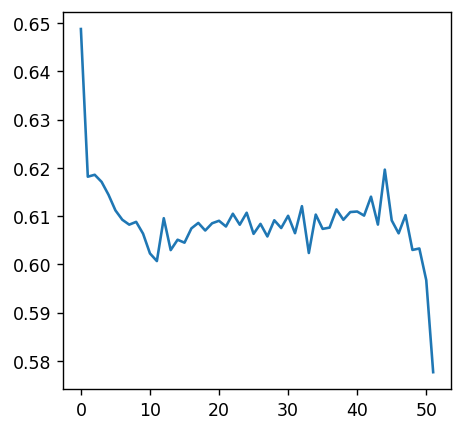

In [49]:
plt.plot(u_fab_amplitude)

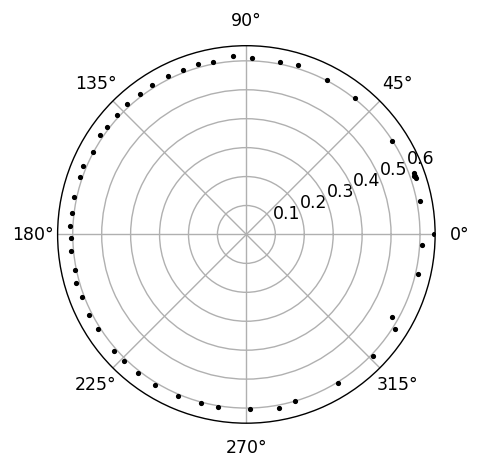

In [50]:
plt.polar(u_fab_phase, u_fab_amplitude, 'k.', ms=4)

## Distancias entre campo escalar y fabricable: A-$\phi$
Estamos en modo escalar. Queremos calcular las distancias entre un campo complejo $A(x,y)e^{i \phi(x,y)}$ y unos elementos fabricables $A_f(x,y)e^{i \phi_f(x,y)}$. Pasamos a campos Er y Ei pues es más sencillo medir distancias

In [51]:
size_x_DOE, size_y_DOE = 11,12

doe_amplitude = np.linspace(0, 1, size_x_DOE)
doe_phase = np.linspace(-np.pi, np.pi, size_y_DOE)

DOE_amplitude, DOE_phase = np.meshgrid(doe_amplitude, doe_phase)

DOE = DOE_amplitude * np.exp(1j*DOE_phase)

In [52]:
%%time
DOE_new, i_positions, distances=distances_scalar(DOE, u_fab)

CPU times: user 9.43 ms, sys: 0 ns, total: 9.43 ms
Wall time: 6.72 ms


In [41]:
print(distances.mean())

0.3854991491924283


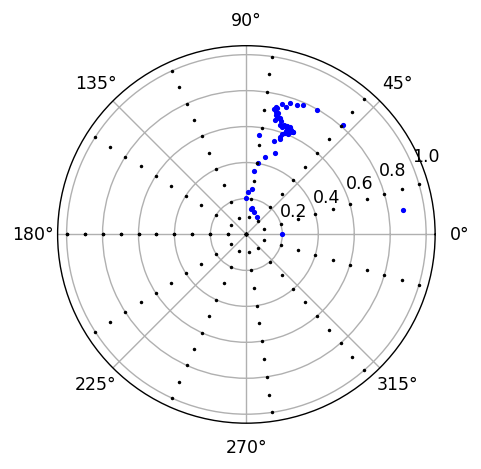

In [42]:
plt.polar(u_fab_phase, u_fab_amplitude, 'b.', ms=4)
plt.polar(DOE_phase, DOE_amplitude, 'k.', ms=2);

## Distancias entre campo escalar y fabricable: u_real, u_image
Estamos en modo escalar. Queremos calcular las distancias entre un campo complejo $A(x,y)e^{i \phi(x,y)}$ y unos elementos fabricables $A_f(x,y)e^{i \phi_f(x,y)}$. Pasamos a campos Er y Ei pues es más sencillo medir distancias

In [43]:
size_x_DOE, size_y_DOE = 11,12

doe_real = np.linspace(-1,1, size_x_DOE)
doe_imag = np.linspace(-1,1, size_y_DOE)

DOE_real, DOE_imag = np.meshgrid(doe_real, doe_imag)

DOE = DOE_real + 1j*DOE_imag

In [44]:
%%time
DOE_new, i_positions, distances=distances_scalar(DOE, u_fab)

CPU times: user 8.49 ms, sys: 849 µs, total: 9.34 ms
Wall time: 6.36 ms


In [45]:
print(distances.mean())

0.5973217332091447


In [46]:
plt.plot(u_fab_real, u_fab_imag, 'b.', ms=4)
plt.plot(DOE_real, DOE_imag, 'k.', ms=2);
plt.grid(True)